In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
coffee = pd.read_csv("coffee-prices-historical-chart-data.csv", header=8)
corn = pd.read_csv("corn-prices-historical-chart-data.csv", header=8)
cotton = pd.read_csv("cotton-prices-historical-chart-data.csv", header=8)
sugar = pd.read_csv("sugar-prices-historical-chart-data.csv", header=8)
cocoa = pd.read_csv("cocoa-futures.csv", header=10)

In [3]:
coffee = coffee.rename(columns = {' value':'Price - USD/LB', 'date': "Date"})
corn = corn.rename(columns = {' value':'Price - USD/Bushel', 'date': "Date"})
cotton = cotton.rename(columns = {' value':'Price - USD/LB', 'date': "Date"})
sugar = sugar.rename(columns = {' value':'Price - USD/LB', 'date': "Date"})
cocoa = cocoa.rename(columns = {' value':'Price - USD/Ton', 'date': "Date"})

In [4]:
coffee['Date'] = pd.to_datetime(coffee['Date'])
corn['Date'] = pd.to_datetime(corn['Date'])
cotton['Date'] = pd.to_datetime(cotton['Date'])
sugar['Date'] = pd.to_datetime(sugar['Date'])
cocoa['Date'] = pd.to_datetime(cocoa['Date'])

In [5]:
#engine = create_engine('sqlite://', echo = False) 

#coffee.to_sql("coffee", engine, dtype={'Date': DateTime, "Price - USD/Ton": Integer})
#corn.to_sql("corn", engine, dtype={'Date': DateTime, "Price - USD/Bushel": Integer})
#cotton.to_sql("cotton", engine, dtype={'Date': DateTime, "Price - USD/LB": Integer})
#sugar.to_sql("sugar", engine, dtype={'Date': DateTime, "Price - USD/LB": Integer})
#cocoa.to_sql("cocoa", engine, dtype={'Date': DateTime, "Price - USD/Ton": Integer})


In [6]:
coffee.to_csv("coffee.csv")
corn.to_csv("corn.csv")
cotton.to_csv("cotton.csv")
sugar.to_csv("sugar.csv")
cocoa.to_csv("cocoa.csv")

In [8]:
df = {"Coffee Date": coffee["Date"], "Coffee Price - USD/LB": coffee["Price - USD/LB"], "Corn Date": corn["Date"], "Corn Price - USD/Bushel": corn["Price - USD/Bushel"], "Cotton Date": cotton["Date"], "Cotton Price - USD/LB": cotton["Price - USD/LB"], "Sugar Date": sugar["Date"], "Sugar Price - USD/LB": sugar["Price - USD/LB"], "Cocoa Date": cocoa["Date"], "Cocoa Price - USD/Ton": cocoa["Price - USD/Ton"]}
total_df = pd.DataFrame(df)
total_df.to_csv("total_df.csv")
total_df

,Coffee Date,Coffee Price - USD/LB,Corn Date,Corn Price - USD/Bushel,Cotton Date,Cotton Price - USD/LB,Sugar Date,Sugar Price - USD/LB,Cocoa Date,Cocoa Price - USD/Ton
0,1973-08-20,0.6735,1959-07-01,1.177,1972-08-22,0.2673,1962-11-29,0.0389,1968-10-01,3425.0
1,1973-08-21,0.6710,1959-07-02,1.176,1972-08-23,0.2703,1962-11-30,0.0384,1968-10-02,3375.0
2,1973-08-22,0.6580,1959-07-06,1.171,1972-08-24,0.2706,1962-12-03,0.0387,1968-10-03,3440.0
3,1973-08-23,0.6675,1959-07-07,1.171,1972-08-25,0.2722,1962-12-04,0.0380,1968-10-04,3440.0
4,1973-08-24,0.6660,1959-07-08,1.170,1972-08-28,0.2704,1962-12-05,0.0375,1968-10-07,3532.0
...,...,...,...,...,...,...,...,...,...,...
15475,NaT,NaN,2020-11-23,NaN,NaT,NaN,NaT,NaN,NaT,NaN
15476,NaT,NaN,2020-11-24,NaN,NaT,NaN,NaT,NaN,NaT,NaN
15477,NaT,NaN,2020-11-25,NaN,NaT,NaN,NaT,NaN,NaT,NaN
15478,NaT,NaN,2020-11-26,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [18]:
sugar_total_df = total_df.set_index("Sugar Date")
cotton_total_df = total_df.set_index("Cotton Date")
cocoa_total_df = total_df.set_index("Cocoa Date")
coffee_total_df = total_df.set_index("Coffee Date")

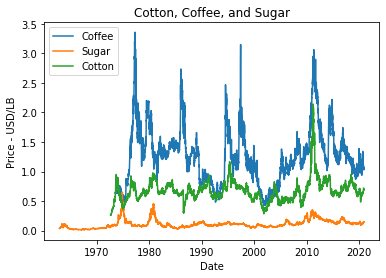

In [40]:
fig = plt.figure()
ax = plt.axes()
ax.plot(total_df["Coffee Date"], total_df["Coffee Price - USD/LB"], label="Coffee")
ax.plot(total_df["Sugar Date"], total_df["Sugar Price - USD/LB"], label="Sugar")
ax.plot(total_df["Cotton Date"], total_df["Cotton Price - USD/LB"], label="Cotton")

ax.legend(loc="best")

plt.title("Cotton, Coffee, and Sugar")
plt.xlabel("Date")
plt.ylabel("Price - USD/LB")
plt.savefig("cotton_coffee_sugar.png")
plt.show()

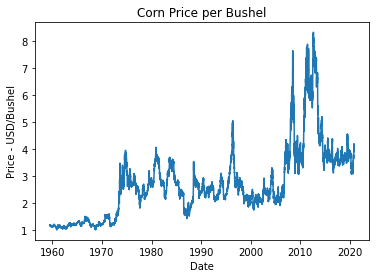

In [45]:
fig = plt.figure()
ax = plt.axes()
ax.plot(total_df["Corn Date"], total_df["Corn Price - USD/Bushel"], label="Corn")

plt.title("Corn Price per Bushel")
plt.xlabel("Date")
plt.ylabel("Price - USD/Bushel")
plt.savefig("corn.png")
plt.show()

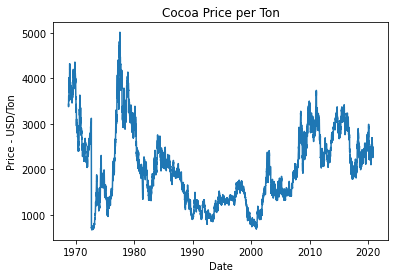

In [46]:
fig = plt.figure()
ax = plt.axes()
ax.plot(total_df["Cocoa Date"], total_df["Cocoa Price - USD/Ton"], label="Cocoa")

plt.title("Cocoa Price per Ton")
plt.xlabel("Date")
plt.ylabel("Price - USD/Ton")
plt.savefig("cocoa.png")
plt.show()
